In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
data = ["Airplane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship", "Truck"]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


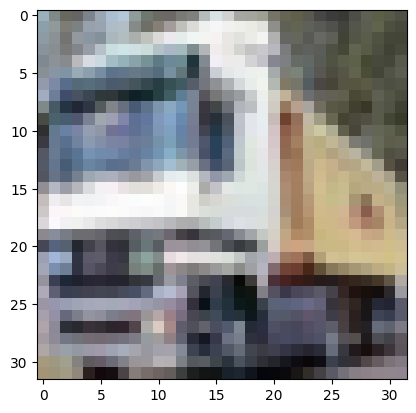

In [ ]:
plt.imshow(X_train[1])

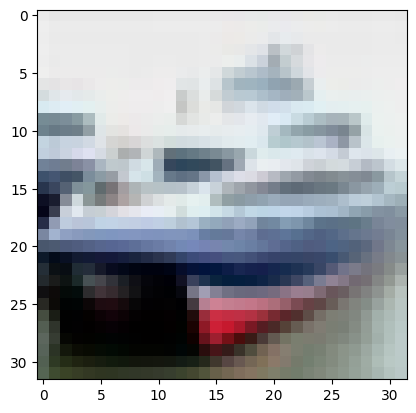

In [ ]:
plt.imshow(X_test[1])

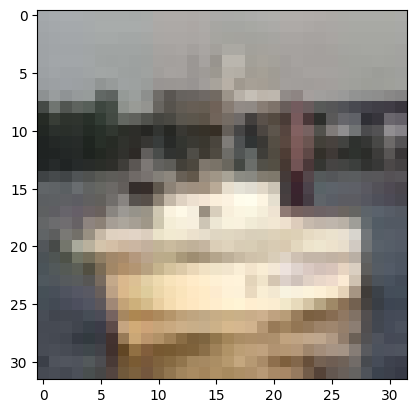

In [ ]:
plt.imshow(X_train[216])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))


In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 365s 233ms/step - loss: 0.5447 - accuracy: 0.8076
Epoch 2/5
1563/1563 [==============================] - 330s 211ms/step - loss: 0.5211 - accuracy: 0.8156
Epoch 3/5
1563/1563 [==============================] - 332s 213ms/step - loss: 0.4940 - accuracy: 0.8233
Epoch 4/5
1563/1563 [==============================] - 325s 208ms/step - loss: 0.4676 - accuracy: 0.8322
Epoch 5/5
1563/1563 [==============================] - 328s 210ms/step - loss: 0.4442 - accuracy: 0.8417


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

NameError: ignored

#ASSIGNMENT-6

##**Text Classification using RNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
consumer = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')

In [ ]:
consumer.head()

Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [ ]:
consumer.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative'],
      dtype='object')

In [ ]:
consumer.describe()

Unnamed: 0
count  101.000000
mean    51.000000
std     29.300171
min      1.000000
25%     26.000000
50%     51.000000
75%     76.000000
max    101.000000

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
texts = consumer['Consumer complaint narrative'].fillna('')
labels = consumer['Product']


In [ ]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
sequences_padded = pad_sequences(sequences, maxlen=max_len)


In [ ]:
label_to_index = {label: index for index, label in enumerate(set(labels))}
labels_encoded = [label_to_index[label] for label in labels]
labels_categorical = to_categorical(labels_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels_categorical, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 1.9371 - accuracy: 0.1111 - val_loss: 1.9050 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 126ms/step - loss: 1.8618 - accuracy: 0.8194 - val_loss: 1.8502 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 128ms/step - loss: 1.7733 - accuracy: 0.8194 - val_loss: 1.7834 - val_accuracy: 0.6250
Epoch 4/10
2/2 [==============================] - 0s 121ms/step - loss: 1.6638 - accuracy: 0.8194 - val_loss: 1.6898 - val_accuracy: 0.6250
Epoch 5/10
2/2 [==============================] - 0s 135ms/step - loss: 1.4927 - accuracy: 0.8194 - val_loss: 1.5594 - val_accuracy: 0.6250
Epoch 6/10
2/2 [==============================] - 0s 119ms/step - loss: 1.2109 - accuracy: 0.8194 - val_loss: 1.5245 - val_accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 0s 128ms/step - loss: 0.9279 - accuracy: 0.8194 - val_loss: 1.6685 - val_accuracy: 0.6250
Epoch 8/10
2/2 [=======

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 47ms/step - loss: 1.0818 - accuracy: 0.7619
Test accuracy: 0.761904776096344


##ASSIGNMENT-7

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

In [ ]:
train_data.head()

text label
0  You must be knowing #blithe means (adj.)  Happ...   joy
1  Old saying 'A #smile shared is one gained for ...   joy
2  Bridget Jones' Baby was bloody hilarious 😅 #Br...   joy
3  @Elaminova sparkling water makes your life spa...   joy
4  I'm tired of everybody telling me to chill out...   joy

In [ ]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

In [ ]:
import numpy as np

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
emotions = set(y_train)
num_classes = len(emotions)
label_to_index = {label: index for index, label in enumerate(emotions)}


In [ ]:
y_train = np.array([label_to_index[label] for label in y_train])
y_test = np.array([label_to_index[label] for label in y_test])

In [ ]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test accuracy:", accuracy)

99/99 [==============================] - 3s 21ms/step - loss: 1.3863 - accuracy: 0.2505
Test accuracy: 0.2504774034023285
